# Analyzing performance of Shape Predictor

In [10]:
from Landmarks_module import Landmarks
import matplotlib.pyplot as plt
import reorganize_fun
import numpy as np
from shapepred_fun import calculate_mae, measure_mse

In [11]:
# Import files
work_dir = '/Users/luciamf/Desktop/Landmarks_generator/example/data/work_data'
xml_file = '/Users/luciamf/Desktop/Landmarks_generator/example/all_data.xml'
test_file = '/Users/luciamf/Desktop/Landmarks_generator/example/data/work_data/test.xml'
train_file = '/Users/luciamf/Desktop/Landmarks_generator/example/data/work_data/train.xml'
dat = '/Users/luciamf/Desktop/Landmarks_generator/example/carabus.dat'

In [12]:
def plot_shape(shape1, shape2):
    i = 0
    for x,y in shape1:
        i+=1
        plt.scatter(x,y, color ='red', marker="$"+str(i)+"$")
    k = 0
    for x,y in shape2:
        k+=1
        plt.scatter(x+100,y, color = 'blue', marker="$"+str(k)+"$")


In [13]:

def mean_squared_distance(shape):
    n = len(shape)
    total_squared_distance = 0
    count = 0
    
    # Loop through each unique pair of points in the shape
    for i in range(n):
        for j in range(i + 1, n):
            x1, y1 = shape[i]
            x2, y2 = shape[j]
            
            # Compute squared Euclidean distance between points
            squared_distance = (x2 - x1) ** 2 + (y2 - y1) ** 2
            euclidean = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
            total_squared_distance += euclidean
            count += 1
    
    # Mean squared distance
    return total_squared_distance / count if count > 0 else 0


In [14]:
def get_xy(landmarks):
    x_list = []
    y_list = []
    for shape in landmarks:
        for x,y in shape:
            x_list.append(x)
            y_list.append(y)
    return x_list,y_list

def get_distance(landmarks):
    all_distances = []
    for shape in landmarks:
        distance = mean_squared_distance(shape)
        all_distances.append(distance)
    return np.array(all_distances)

## All Data

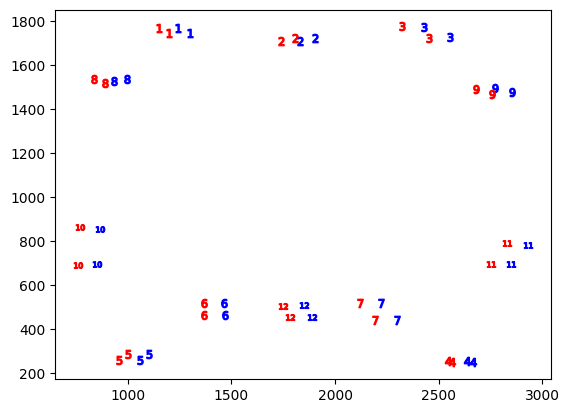

In [15]:
# Initialize object and get shapes

Landmarks.flip_dir = work_dir

def get_shapes(xml_file):

    data = Landmarks(xml_file)
    lm_dict = data.lm_dict
    optimal_order = []
    pred_landmarks = []
    real_landmarks = []
    j = 0
    for img, real_lm in lm_dict.items():
        pred_array, img = data.predict_shape(dat, img)  
        real_shape = np.array(real_lm)     
        # print(pred_array)
        pred_shape, optimal_order = reorganize_fun.order_shape(real_shape, pred_array, optimal_order)
        if j < 2:
            plot_shape(real_shape, pred_shape)
            j+=1
        pred_landmarks.append(pred_shape)
        real_landmarks.append(real_shape)

    return data, pred_landmarks, real_landmarks

data, pred_landmarks, real_landmarks = get_shapes(xml_file)

# K-means cluster with mse distances 

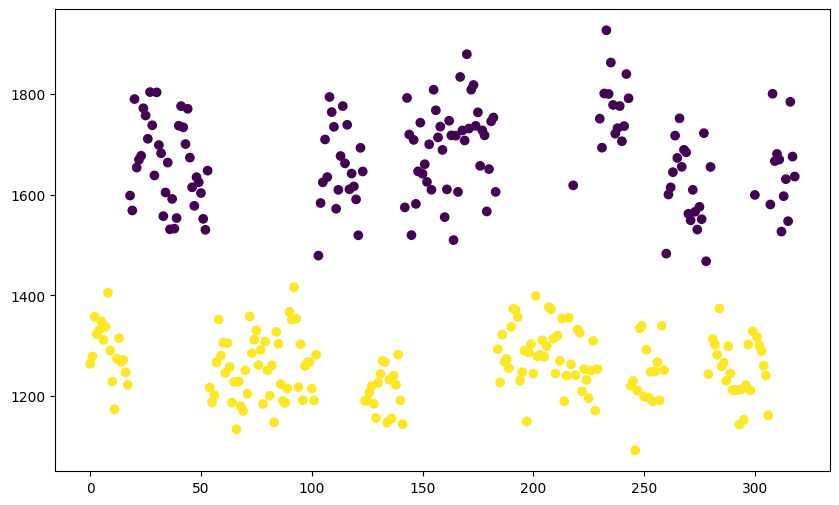

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = pred_distances

# Reshape for K-Means (each point is a single feature)
data_reshaped = data.reshape(-1, 1)

# Default k value
k = 2

# Apply K-Means
kmeans = KMeans(n_clusters=k, random_state=53)
clusters = kmeans.fit_predict(data_reshaped)
centers = kmeans.cluster_centers_

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(range(len(data)), data, c=clusters, cmap='viridis', label='Data Points')
plt.scatter(np.arange(len(data))[np.argsort(data)], np.sort(data), c=clusters[np.argsort(data)], cmap='viridis', marker='o', s=10)


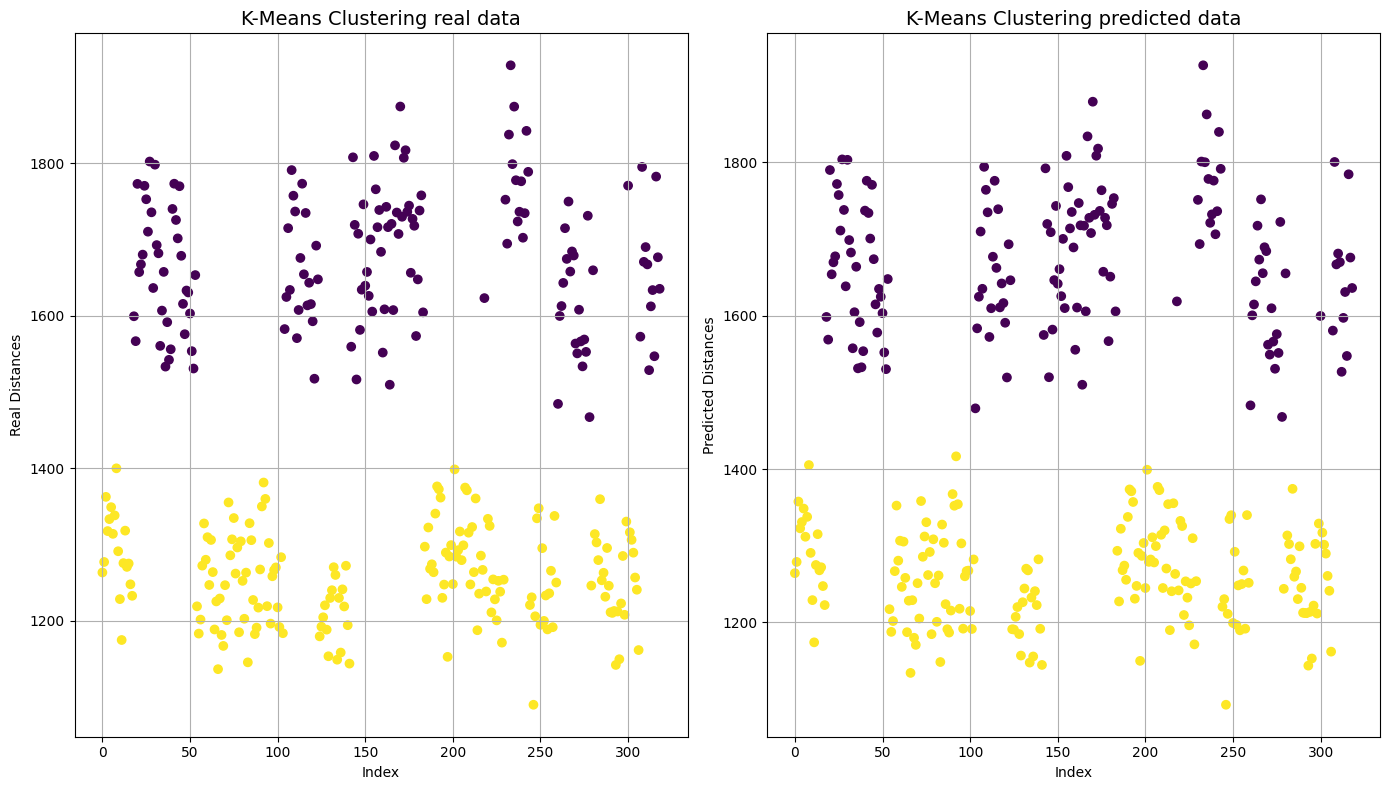

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

pred_distances = get_distance(list(pred_landmarks))
real_distances = get_distance(list(real_landmarks))

# Reshape for K-Means (each point is a single feature)
pred_distances_reshaped = pred_distances.reshape(-1, 1)
real_distances_reshaped = real_distances.reshape(-1, 1)

# Default k value
k = 2

# Apply K-Means
#real
real_kmeans = KMeans(n_clusters=k, random_state=53)
real_clusters = real_kmeans.fit_predict(real_distances_reshaped)
real_centers = real_kmeans.cluster_centers_

#pred
pred_kmeans = KMeans(n_clusters=k, random_state=53)
pred_clusters = pred_kmeans.fit_predict(pred_distances_reshaped)
pred_centers = pred_kmeans.cluster_centers_

# Create two side-by-side subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 8))

# Plot in the first subplot
axs[0].scatter(range(len(real_distances)), real_distances, c=real_clusters, cmap='viridis', label='Data Points')
# axs[0].scatter(np.arange(len(real_distances))[np.argsort(real_distances)], np.sort(data), 
#                c=clusters[np.argsort(real_distances)], cmap='viridis', marker='o', s=10)
axs[0].set_title('K-Means Clustering real data', fontsize=14)
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Real Distances')
axs[0].grid(True)

# Plot in the second subplot (identical plot)
axs[1].scatter(range(len(pred_distances)), pred_distances, c=pred_clusters, cmap='viridis', label='Data Points')
# axs[1].scatter(np.arange(len(pred_distances))[np.argsort(pred_distances)], np.sort(data), 
#                c=clusters[np.argsort(pred_distances)], cmap='viridis', marker='o', s=10)
axs[1].set_title('K-Means Clustering predicted data', fontsize=14)
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Predicted Distances')
axs[1].grid(True)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()



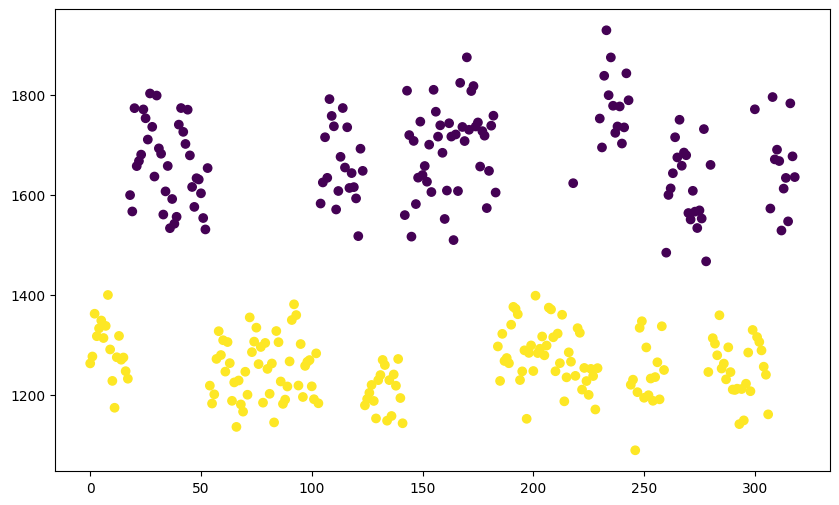

In [18]:
data = real_distances

# Reshape for K-Means (each point is a single feature)
data_reshaped = data.reshape(-1, 1)

# Default k value
k = 2

# Apply K-Means
kmeans = KMeans(n_clusters=k, random_state=53)
clusters = kmeans.fit_predict(data_reshaped)
centers = kmeans.cluster_centers_

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(range(len(data)), data, c=clusters, cmap='viridis', label='Data Points')
plt.scatter(np.arange(len(data))[np.argsort(data)], np.sort(data), c=clusters[np.argsort(data)], cmap='viridis', marker='o', s=10)


In [19]:
pred_landmarks

[array([[1141, 1770],
        [1733, 1713],
        [2330, 1776],
        [2538,  255],
        [ 960,  259],
        [1365,  520],
        [2121,  518],
        [ 831, 1531],
        [2674, 1499],
        [ 753,  695],
        [2749,  697],
        [1752,  510]]),
 array([[1201, 1748],
        [1804, 1723],
        [2453, 1728],
        [2565,  249],
        [1004,  287],
        [1369,  464],
        [2197,  440],
        [ 897, 1538],
        [2753, 1479],
        [ 764,  855],
        [2833,  785],
        [1787,  455]]),
 array([[1397, 1827],
        [1980, 1717],
        [2689, 1767],
        [2817,  212],
        [1111,  245],
        [1504,  428],
        [2382,  406],
        [ 961, 1485],
        [3044, 1439],
        [ 876,  802],
        [3036,  752],
        [1942,  414]]),
 array([[ 653, 1872],
        [1335, 1852],
        [2011, 1869],
        [2182,  360],
        [ 531,  375],
        [ 919,  613],
        [1785,  593],
        [ 331, 1576],
        [2376, 1522],
    

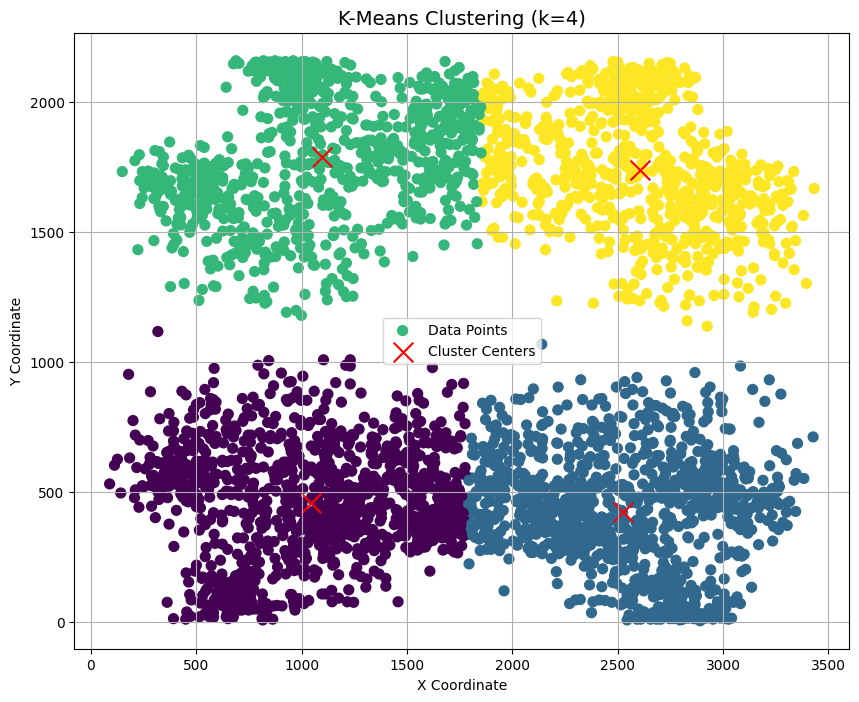

In [20]:
# Flatten the arrays into a single 2D dataset
data_list = real_landmarks

# Combine all points into a single array
data_combined = np.vstack(data_list)

# Default number of clusters
k = 4

# Apply K-Means to the combined dataset
kmeans_2d = KMeans(n_clusters=k, random_state=42)
clusters_2d = kmeans_2d.fit_predict(data_combined)
centers_2d = kmeans_2d.cluster_centers_

# Visualization of the clusters
plt.figure(figsize=(10, 8))
plt.scatter(data_combined[:, 0], data_combined[:, 1], c=clusters_2d, cmap='viridis', s=50, label='Data Points')
plt.scatter(centers_2d[:, 0], centers_2d[:, 1], c='red', s=200, marker='x', label='Cluster Centers')
plt.title('K-Means Clustering (k=4)', fontsize=14)
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)
plt.show()


1. Aggregate Shape Data:
- Treat each group of 12 points as a single shape.
- Represent each shape by a feature vector (e.g., concatenate the coordinates into a flat array).
2. Run K-Means:
- Apply K-Means clustering to these shape representations.
- Determine clusters of shapes.
3. Visualize Results:
- Display the clusters of shapes, optionally showing their grouped points.
4. Plan for Visualization:
- Plot each shape in its cluster.
- Indicate cluster centers if applicable.

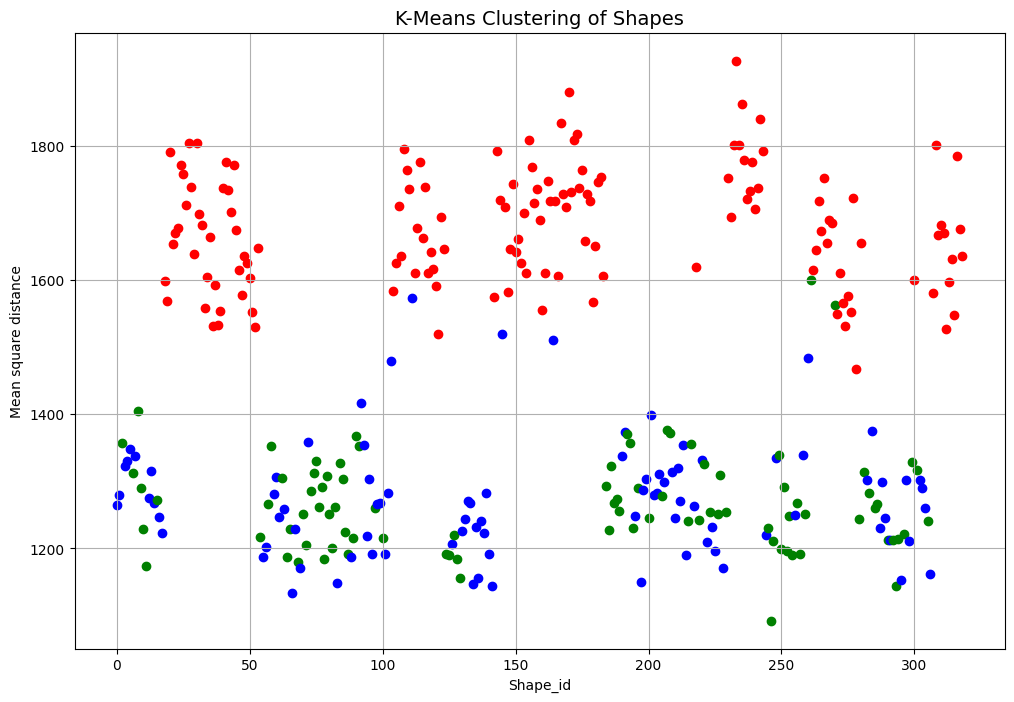

In [21]:
color_array = ['red', 'green', 'blue', 'yellow']

# Flatten the arrays into a single 2D dataset
data_list = real_landmarks

# Step 1: Flatten each shape into a single feature vector
shapes = [group.reshape(-1) for group in data_list]  # Flatten each group of points

# Combine into a single dataset of shapes
shape_data = np.array(shapes)

# Apply K-Means to the shapes
k_shapes = 3  # Default number of clusters
kmeans_shapes = KMeans(n_clusters=k_shapes, random_state=42)
clusters_shapes = kmeans_shapes.fit_predict(shape_data)
centers_shapes = kmeans_shapes.cluster_centers_

# Visualization: Plot the shapes grouped by their cluster assignments
plt.figure(figsize=(12, 8))
for i, group in enumerate(data_list):
    cluster_id = clusters_shapes[i]
    mse_distance = list(pred_distances)[i]
    points = group
    plt.scatter(i, mse_distance, c=color_array[cluster_id])

plt.title('K-Means Clustering of Shapes', fontsize=14)
plt.xlabel('Shape_id')
plt.ylabel('Mean square distance')
plt.grid(True)
plt.show()


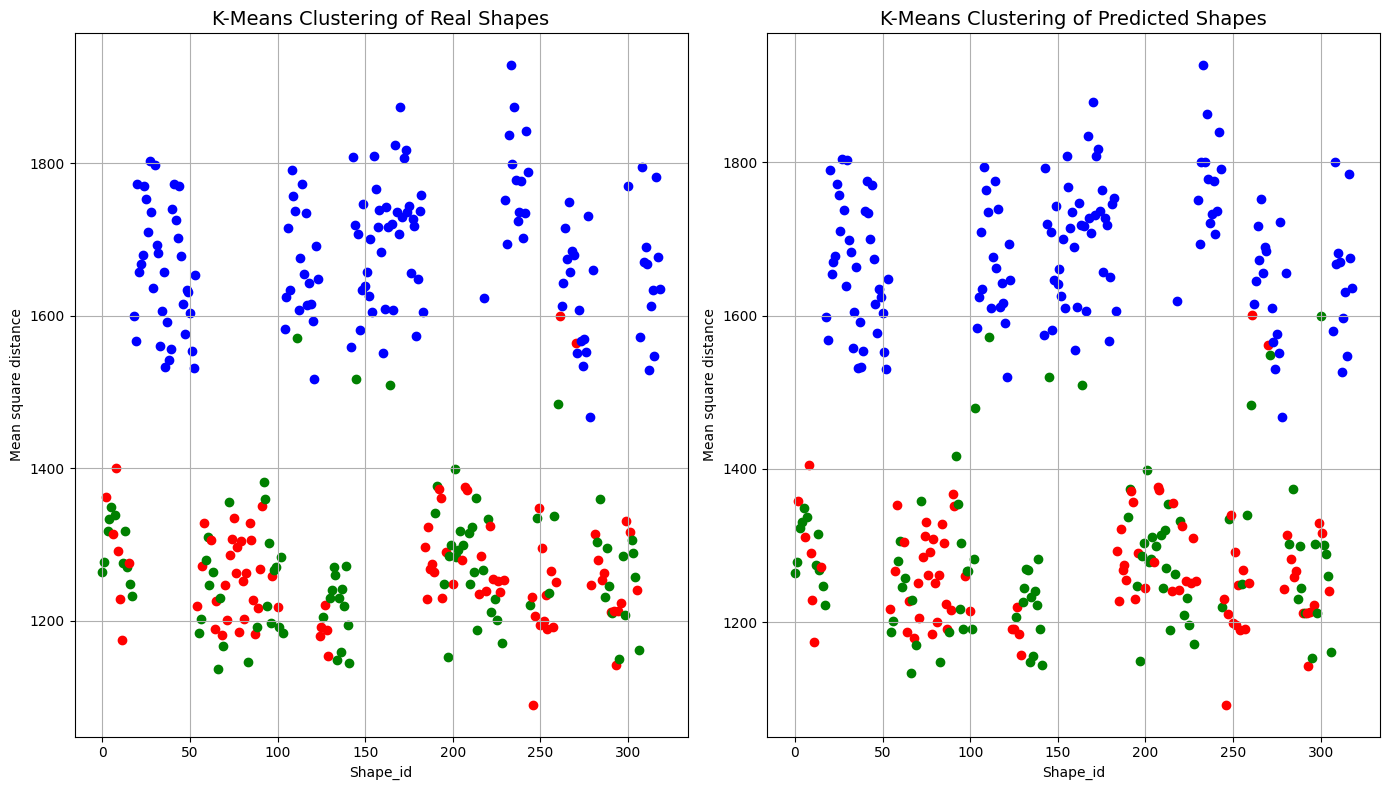

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming `real_landmarks` and `pred_distances` are already defined in your code

color_array = ['red', 'green', 'blue', 'yellow']


# Step 1: Flatten each shape into a single feature vector
real_shapes = [group.reshape(-1) for group in real_landmarks]  # Flatten each group of points
pred_shapes = [group.reshape(-1) for group in pred_landmarks]  # Flatten each group of points

# Combine into a single dataset of shapes
real_shape_data = np.array(real_shapes)
pred_shape_data = np.array(pred_shapes)

# Apply K-Means to the shapes
k_shapes = 3  # Default number of clusters

# real
kmeans_shapes = KMeans(n_clusters=k_shapes, random_state=53)
real_clusters_shapes = kmeans_shapes.fit_predict(real_shape_data)
real_centers_shapes = kmeans_shapes.cluster_centers_

# pred
kmeans_shapes = KMeans(n_clusters=k_shapes, random_state=53)
pred_clusters_shapes = kmeans_shapes.fit_predict(pred_shape_data)
pred_centers_shapes = kmeans_shapes.cluster_centers_

# Create two side-by-side subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 8))

# Plot in the first subplot
for i, group in enumerate(real_landmarks):
    cluster_id = real_clusters_shapes[i]
    mse_distance = list(real_distances)[i]
    points = group
    axs[0].scatter(i, mse_distance, c=color_array[cluster_id])

axs[0].set_title('K-Means Clustering of Real Shapes', fontsize=14)
axs[0].set_xlabel('Shape_id')
axs[0].set_ylabel('Mean square distance')
axs[0].grid(True)

# Plot in the second subplot (identical plot)
for i, group in enumerate(pred_landmarks):
    cluster_id = pred_clusters_shapes[i]
    mse_distance = list(pred_distances)[i]
    points = group
    axs[1].scatter(i, mse_distance, c=color_array[cluster_id])

axs[1].set_title('K-Means Clustering of Predicted Shapes', fontsize=14)
axs[1].set_xlabel('Shape_id')
axs[1].set_ylabel('Mean square distance')
axs[1].grid(True)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


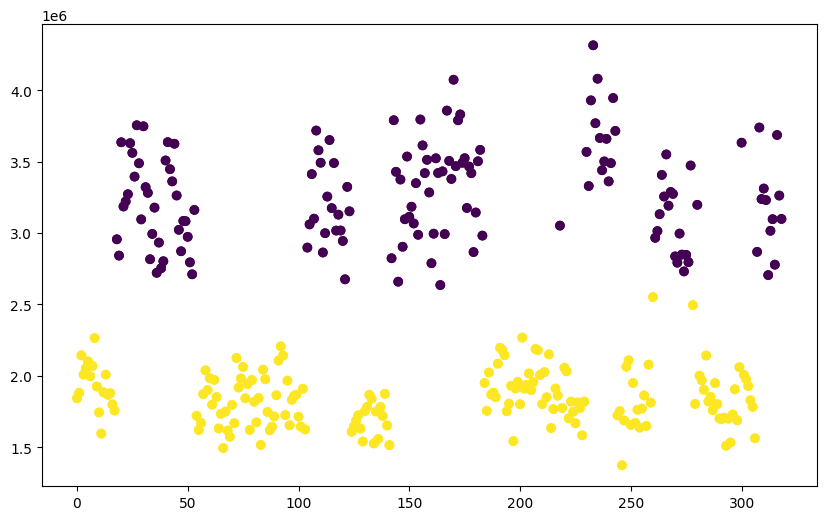

In [23]:
from scipy.spatial.distance import pdist, squareform

# Step 1: Compute Mean Squared Distance for each shape
msd_values = []
for group in data_list:
    # Compute pairwise squared distances
    distances = pdist(group, metric='sqeuclidean')  # Pairwise squared distances
    mean_squared_distance = np.mean(distances)     # Mean of squared distances
    msd_values.append(mean_squared_distance)

msd_values = np.array(msd_values).reshape(-1, 1)  # Reshape for K-Means

# Step 2: Apply K-Means to the MSD values
k_msd = 2 # Number of clusters
kmeans_msd = KMeans(n_clusters=k_msd, random_state=42)
clusters_msd = kmeans_msd.fit_predict(msd_values)
centers_msd = kmeans_msd.cluster_centers_

# Step 3: Visualization
plt.figure(figsize=(10, 6))
plt.scatter(range(len(msd_values)), msd_values.flatten(), c=clusters_msd, cmap='viridis')
plt.scatter(range(len(msd_values)), msd_values.flatten(), c=clusters_msd, cmap='viridis', label='Shaped')


In [24]:
x_pred,y_pred = get_xy(pred_landmarks)
x_real,y_real = get_xy(real_landmarks)


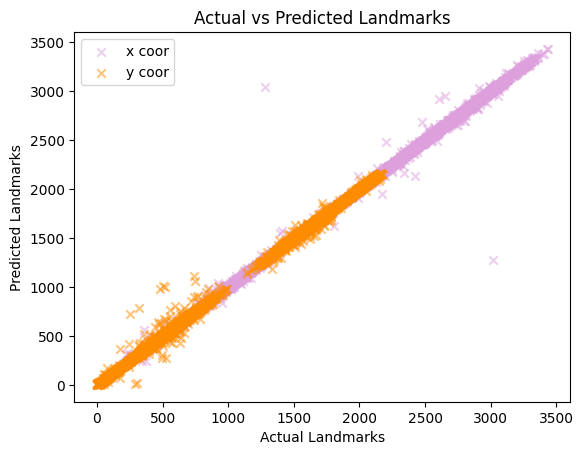

In [25]:
plt.scatter(x_pred, x_real, alpha = 0.5, marker ='x', color='plum', label='x coor')
plt.scatter(y_pred, y_real, alpha = 0.5, marker='x', color='darkorange', label='y coor')
plt.xlabel('Actual Landmarks')
plt.ylabel('Predicted Landmarks')
plt.title('Actual vs Predicted Landmarks')
plt.legend()
plt.show()

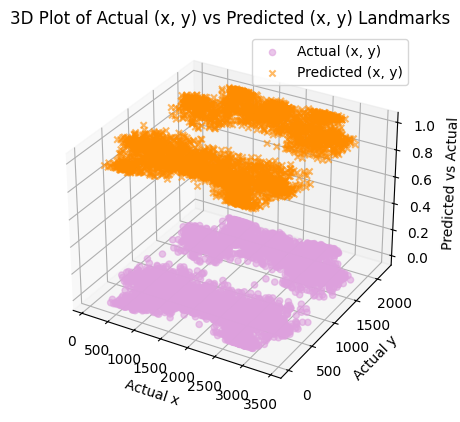

In [26]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with your actual data)
# x_pred, x_real, y_pred, y_real = ...

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for actual vs predicted (x, y) coordinates
# x_real vs x_pred and y_real vs y_pred
ax.scatter(x_real, y_real, zs=0, zdir='z', alpha=0.6, color='plum', marker='o', label='Actual (x, y)')
ax.scatter(x_pred, y_pred, zs=1, zdir='z', alpha=0.6, color='darkorange', marker='x', label='Predicted (x, y)')

# Set axis labels and title
ax.set_xlabel('Actual x')
ax.set_ylabel('Actual y')
ax.set_zlabel('Predicted vs Actual')
ax.set_title('3D Plot of Actual (x, y) vs Predicted (x, y) Landmarks')

# Legend and show plot
ax.legend()
plt.show()



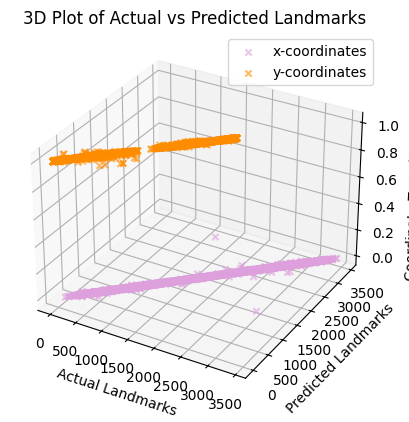

In [27]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Sample data for demonstration (Replace with your actual data)
# x_pred, x_real, y_pred, y_real = ...

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Convert x and y data into numpy arrays (assuming your data are lists)
x_real = np.array(x_real)
x_pred = np.array(x_pred)
y_real = np.array(y_real)
y_pred = np.array(y_pred)

# Scatter plot for x coordinates (z=0 for x-coordinates)
ax.scatter(x_real, x_pred, zs=0, zdir='z', alpha=0.6, marker='x', color='plum', label='x-coordinates')

# Scatter plot for y coordinates (z=1 for y-coordinates)
ax.scatter(y_real, y_pred, zs=1, zdir='z', alpha=0.6, marker='x', color='darkorange', label='y-coordinates')

# Set axis labels and title
ax.set_xlabel('Actual Landmarks')
ax.set_ylabel('Predicted Landmarks')
ax.set_zlabel('Coordinate Type (0=x, 1=y)')
ax.set_title('3D Plot of Actual vs Predicted Landmarks')

# Legend and show plot
ax.legend()
plt.show()

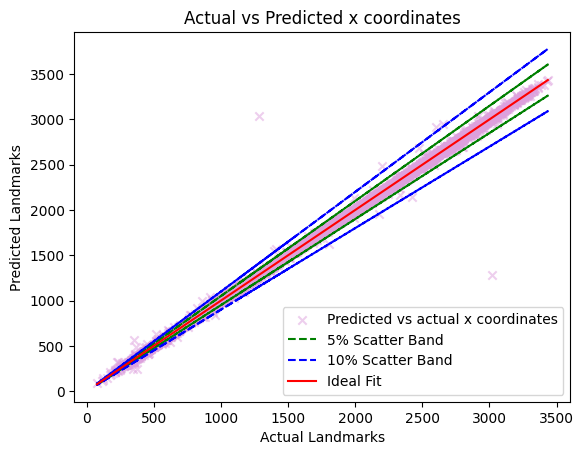

In [28]:

# Define the percentage for scatter bands
percent_5 = 0.05
percent_10 = 0.10

x_pred = np.array(x_pred)

# Calculate the scatter bands
upper_5 = x_pred * (1 + percent_5)
lower_5 = x_pred * (1 - percent_5)

upper_10 = x_pred * (1 + percent_10)
lower_10 = x_pred * (1 - percent_10)

# Plotting the actual vs predicted
plt.scatter(x_pred, x_real, alpha = 0.5, marker='x', label="Predicted vs actual x coordinates", color='plum')

# Plotting the scatter bands
plt.plot(x_pred, upper_5, 'g--', label='5% Scatter Band')
plt.plot(x_pred, lower_5, 'g--')
plt.plot(x_pred, upper_10, 'b--', label='10% Scatter Band')
plt.plot(x_pred, lower_10, 'b--')

# Plotting the line y = x for reference
plt.plot([x_pred.min(), x_pred.max()], [x_pred.min(), x_pred.max()], 'r-', label='Ideal Fit')


# Adding labels and legend
plt.xlabel('Actual Landmarks')
plt.ylabel('Predicted Landmarks')
plt.title('Actual vs Predicted x coordinates')
plt.legend()
plt.show()

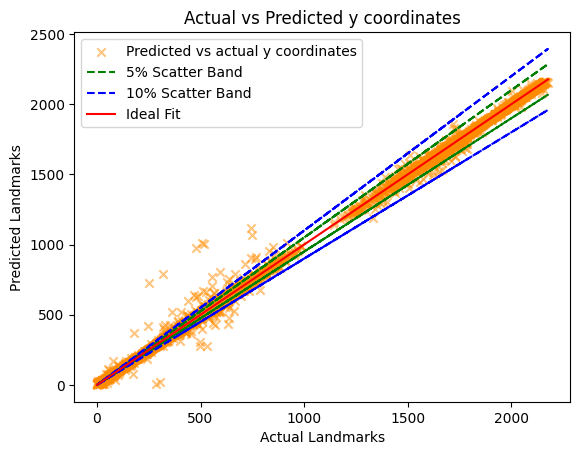

In [29]:

y_pred = np.array(y_pred)


# Define the percentage for scatter bands
percent_5 = 0.05
percent_10 = 0.10

# Calculate the scatter bands
upper_5 = y_pred * (1 + percent_5)
lower_5 = y_pred * (1 - percent_5)

upper_10 = y_pred * (1 + percent_10)
lower_10 = y_pred * (1 - percent_10)

# Plotting the actual vs predicted
plt.scatter(y_pred, y_real, alpha = 0.5, marker='x', color='darkorange', label="Predicted vs actual y coordinates")

# Plotting the scatter bands
plt.plot(y_pred, upper_5, 'g--', label='5% Scatter Band')
plt.plot(y_pred, lower_5, 'g--')
plt.plot(y_pred, upper_10, 'b--', label='10% Scatter Band')
plt.plot(y_pred, lower_10, 'b--')

# Plotting the line y = x for reference
plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], 'r-', label='Ideal Fit')

# Adding labels and legend
plt.xlabel('Actual Landmarks')
plt.ylabel('Predicted Landmarks')
plt.title('Actual vs Predicted y coordinates')
plt.legend()

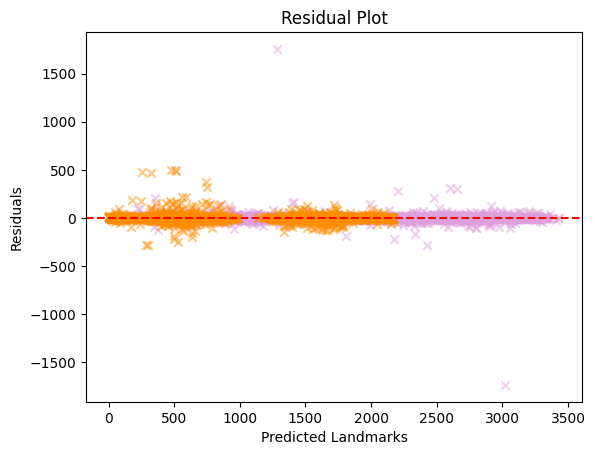

In [30]:
x_residuals = np.array(x_real) - np.array(x_pred)
y_residuals = np.array(y_real) - np.array(y_pred)
plt.scatter(x_pred, x_residuals, alpha = 0.5, marker ='x', color = 'plum', label='x coor')
plt.scatter(y_pred, y_residuals, alpha = 0.5, marker ='x', color ='darkorange', label='y coor')
plt.xlabel('Predicted Landmarks')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

## Histograms

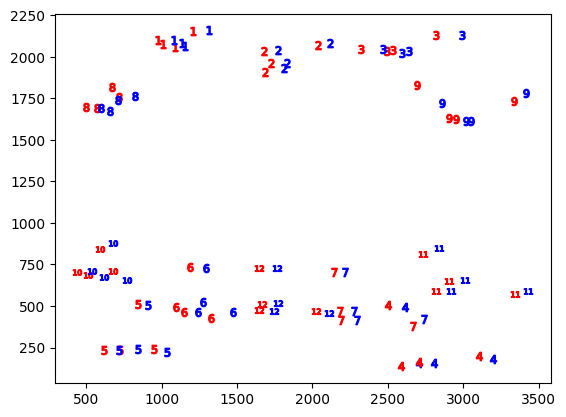

In [31]:
test, test_pred, test_real = get_shapes(test_file)
train, train_pred, train_real = get_shapes(train_file)

In [32]:
allmae, allmre = data.calculate_error(dat, xml_file) 
print("Dlib's MAE:")
measure_mse(dat, xml_file)
trainmae, trainmre = train.calculate_error(dat, train_file) 
print("Dlib's MAE:")
measure_mse(dat, train_file)
testmae, testmre = test.calculate_error(dat, test_file) 
print("Dlib's MAE:")
measure_mse(dat, test_file)



AttributeError: 'numpy.ndarray' object has no attribute 'calculate_error'

In [16]:
plt.hist(list(allmre), alpha = 0.2, bins=150, label='all')
plt.hist(list(testmre), alpha = 0.2, bins=50, label='test')
plt.hist(list(trainmre), alpha = 0.2, bins=150, label='train')
plt.xlabel('Shapes')
plt.ylabel('MRE Histogram')
plt.title('Mean Relative Error')
plt.xlim(-0, 0.05)
plt.legend()
plt.show()

NameError: name 'allmre' is not defined

In [17]:
plt.hist(list(allmae), alpha = 0.3, bins=range(0,400, 10), label='all')
plt.hist(list(testmae), alpha = 0.3, bins=range(0,400, 10), label='test')
plt.hist(list(trainmae), alpha = 0.3, bins=range(0,400, 10), label='train')
plt.xlim(0, 400)
plt.xlabel('Shapes')
plt.ylabel('MAE Histogram')
plt.title('Mean Absolute Error')
plt.legend()
# plt.axhline(y=0, color='r', linestyle='--')
plt.show()

NameError: name 'allmae' is not defined

In [18]:
plt.hist(list(allmae), alpha = 0.3, bins=range(0,100, 2), label='all')
plt.hist(list(testmae), alpha = 0.3, bins=range(0,100, 2), label='test')
plt.hist(list(trainmae), alpha = 0.3, bins=range(0,100, 2), label='train')
plt.xlim(0, 100)
plt.xlabel('Shapes')
plt.ylabel('MAE Histogram')
plt.title('Mean Absolute Error')
plt.legend()
plt.show()

NameError: name 'allmae' is not defined

In [19]:
# plt.hist(list(allmae), alpha = 0.3, bins=range(60,400, 15), label='all')
plt.hist(list(testmae), alpha = 0.3, bins=range(60,400, 10), label='test')
plt.hist(list(trainmae), alpha = 0.3, bins=range(60,400, 10), label='train')
plt.xlim(40, 400)
plt.ylim(0,20)
plt.xlabel('Shapes')
plt.ylabel('MAE Histogram')
plt.title('Mean Absolute Error')
plt.legend()
# plt.axhline(y=0, color='r', linestyle='--')
plt.show()

NameError: name 'testmae' is not defined

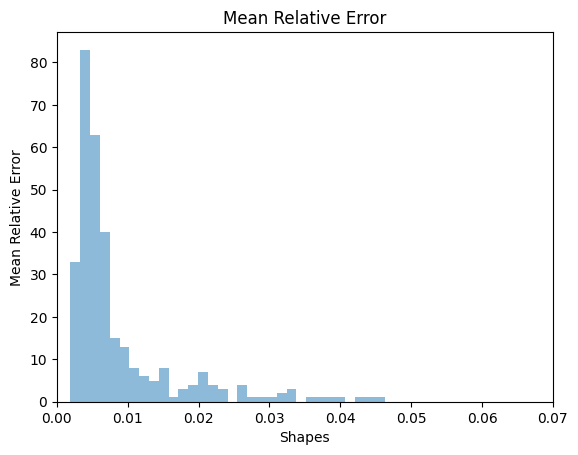

In [45]:
plt.hist(list(allmre), alpha = 0.5, bins=150)
plt.xlabel('Shapes')
plt.ylabel('Mean Relative Error')
plt.title('Mean Relative Error')
plt.xlim(-0, 0.07)
# plt.axhline(y=0, color='r', linestyle='--')
plt.show()

Plot kNN

In [20]:
pred_distance = get_distance(pred_landmarks)
real_distance = get_distance(real_landmarks)
pred_landmarks_flat = np.vstack(pred_landmarks)
real_landmarks_flat = np.vstack(real_landmarks)


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from mpl_toolkits.mplot3d import Axes3D

In [22]:
def get_knn_distances(landmarks, k=5):
    # Use NearestNeighbors to find the k nearest neighbors for each point
    nbrs = NearestNeighbors(n_neighbors=k).fit(landmarks)
    distances, indices = nbrs.kneighbors(landmarks)
    return distances, indices

In [23]:
# Set the number of nearest neighbors (k)
k = 3

# Get distances and indices for k-nearest neighbors for predicted and real landmarks
pred_distances, pred_indices = get_knn_distances(pred_landmarks_flat, k=k)
real_distances, real_indices = get_knn_distances(real_landmarks_flat, k=k)

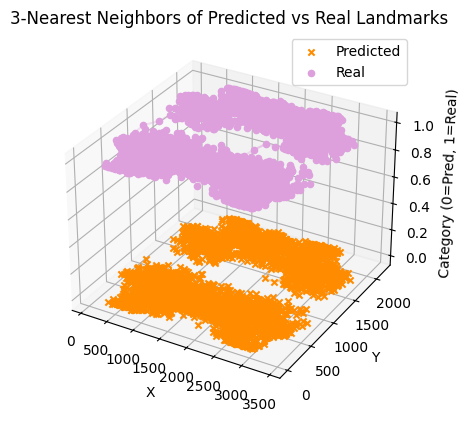

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot predicted landmarks and their kNN distances
for i, (dist, idx) in enumerate(zip(pred_distances, pred_indices)):
    x, y = pred_landmarks_flat[i]
    ax.scatter(x, y, zs=0, color='darkorange', label='Predicted' if i == 0 else "", marker='x')
    # Plot lines to k-nearest neighbors
    for j in idx[1:]:  # Skip the first index (itself)
        x_neigh, y_neigh = pred_landmarks_flat[j]
        ax.plot([x, x_neigh], [y, y_neigh], [0, 0], color='darkorange', alpha=0.3)

# Plot real landmarks and their kNN distances
for i, (dist, idx) in enumerate(zip(real_distances, real_indices)):
    x, y = real_landmarks_flat[i]
    ax.scatter(x, y, zs=1, color='plum', label='Real' if i == 0 else "", marker='o')
    # Plot lines to k-nearest neighbors
    for j in idx[1:]:  # Skip the first index (itself)
        x_neigh, y_neigh = real_landmarks_flat[j]
        ax.plot([x, x_neigh], [y, y_neigh], [1, 1], color='plum', alpha=0.3)

# Set labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Category (0=Pred, 1=Real)')
ax.set_title(f'{k}-Nearest Neighbors of Predicted vs Real Landmarks')
ax.legend()
plt.show()


[11.          8.06225775  5.09901951  5.38516481  1.          2.23606798
  1.          8.60232527  6.40312424  5.65685425  1.41421356  4.47213595]
[ 2.23606798  3.60555128  2.          3.16227766  5.38516481  1.41421356
  4.47213595 17.4642492   9.43398113 10.81665383  9.48683298  4.12310563]
[ 8.54400375  8.06225775 13.          2.23606798 10.19803903  2.82842712
  1.41421356 29.06888371  9.         12.04159458 11.18033989  3.60555128]
[ 6.40312424  2.82842712  6.32455532 10.44030651 12.16552506  9.05538514
  9.          2.23606798  7.28010989 22.56102835 16.          5.        ]
[ 10.44030651   7.           5.38516481   7.28010989  27.29468813
   2.23606798  35.34119409 103.5857133   47.42362281 146.9727866
 128.84486796   6.40312424]
[ 2.          2.82842712  2.82842712  5.         11.66190379  2.23606798
  9.         27.45906044 15.13274595  2.          8.24621125  4.12310563]
[10.19803903  7.81024968  1.41421356  3.60555128  5.83095189 10.77032961
  6.32455532  9.48683298 12.20655

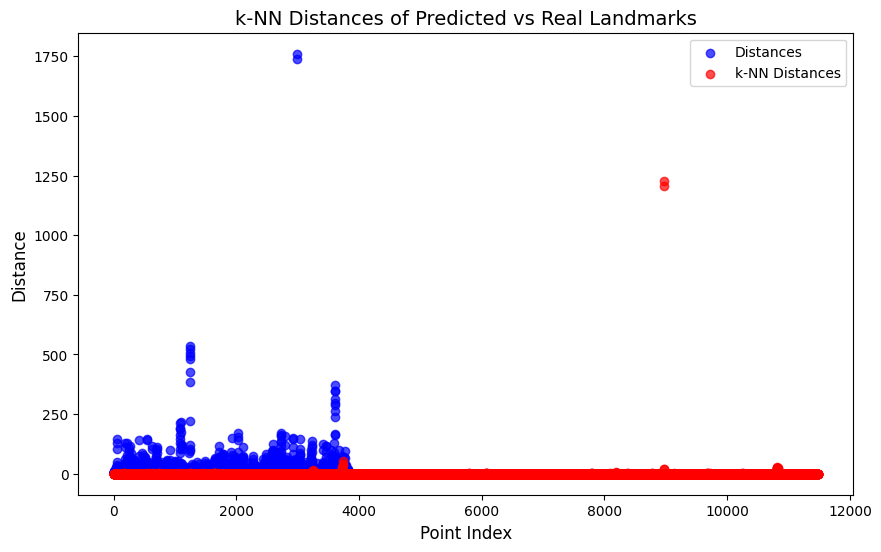

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors


# Function to calculate Euclidean distance between corresponding points in two shapes
def calculate_distance(pred_shape, real_shape):
    return np.linalg.norm(pred_shape - real_shape, axis=1)

# Calculate the distances for each pair of shapes
distances = []
for pred, real in zip(pred_landmarks, real_landmarks):
    print(calculate_distance(pred, real))
    distances.append(calculate_distance(pred, real))

# Flatten the distances into a single array for k-NN
distances = np.concatenate(distances)

# Create a k-NN model to find the nearest distances
k = 3  # Number of nearest neighbors
nbrs = NearestNeighbors(n_neighbors=k)
nbrs.fit(distances.reshape(-1, 1))  # Reshape for fitting into k-NN model

# Get the k-nearest distances and their indices
distances_knn, indices_knn = nbrs.kneighbors(distances.reshape(-1, 1))

# Plotting the results
plt.figure(figsize=(10, 6))

# Plot the k-NN distances for each shape
plt.scatter(range(len(distances)), distances, label='Distances', color='blue', alpha=0.7)
plt.scatter(range(len(distances_knn.flatten())), distances_knn.flatten(), label='k-NN Distances', color='red', alpha=0.7)
plt.title("k-NN Distances of Predicted vs Real Landmarks", fontsize=14)
plt.xlabel("Point Index", fontsize=12)
plt.ylabel("Distance", fontsize=12)
plt.legend()
plt.show()


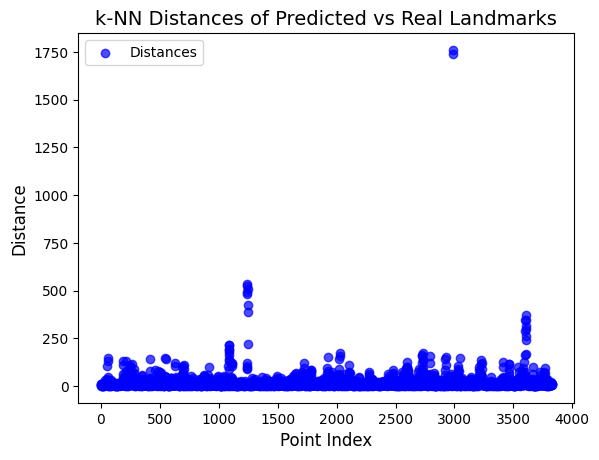

In [26]:
# Plot the Real distances for each shape
plt.scatter(range(len(distances)), distances, label='Distances', color='blue', alpha=0.7)

plt.title("k-NN Distances of Predicted vs Real Landmarks", fontsize=14)
plt.xlabel("Point Index", fontsize=12)
plt.ylabel("Distance", fontsize=12)
plt.legend()
plt.show()

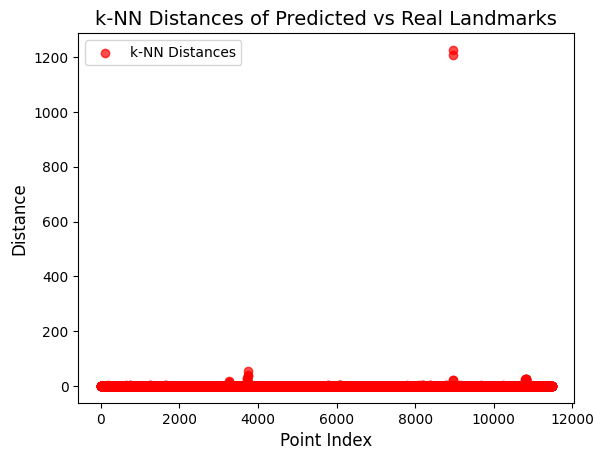

In [27]:
plt.scatter(range(len(distances_knn.flatten())), distances_knn.flatten(), label='k-NN Distances', color='red', alpha=0.7)
plt.title("k-NN Distances of Predicted vs Real Landmarks", fontsize=14)
plt.xlabel("Point Index", fontsize=12)
plt.ylabel("Distance", fontsize=12)
plt.legend()
plt.show()

In [28]:
import numpy as np

def calculate_distance_matrix(landmarks):
    """
    Calculate the pairwise Euclidean distance matrix for a set of landmarks.
    :param landmarks: A 2D numpy array of shape (n_points, 2), where each row is a (x, y) coordinate.
    :return: A 2D numpy array of pairwise distances.
    """
    distances = np.linalg.norm(landmarks[:, np.newaxis] - landmarks, axis=2)
    return distances


In [29]:

# Calculate pairwise distances for predicted landmarks and real landmarks
pred_distance_matrix = calculate_distance_matrix(np.array(pred_landmarks))
real_distance_matrix = calculate_distance_matrix(np.array(real_landmarks))

print("Predicted Distance Matrix:\n", pred_distance_matrix)
print("Real Distance Matrix:\n", real_distance_matrix)

def compute_mean_distance(pred_dist_matrix, real_dist_matrix):
    """
    Compute the mean distance between the predicted and real shapes.
    :param pred_dist_matrix: Pairwise distance matrix for predicted landmarks.
    :param real_dist_matrix: Pairwise distance matrix for real landmarks.
    :return: Mean distance between the predicted and real shapes.
    """
    # For each point in the predicted shape, find the corresponding point in the real shape
    # and compute the absolute difference in their pairwise distances
    mean_distances = np.abs(pred_dist_matrix - real_dist_matrix)

    # Calculate the mean of all the distances
    return np.mean(mean_distances)

# Calculate the mean distance between predicted and real shapes
mean_distance = compute_mean_distance(pred_distance_matrix, real_distance_matrix)
print(f"Mean distance between predicted and real shapes: {mean_distance}")

from sklearn.neighbors import NearestNeighbors

def compute_knn_distances(landmarks, k=3):
    """
    Compute the k-nearest neighbors (k-NN) distances for a set of landmarks.
    :param landmarks: A 2D numpy array of shape (n_points, 2), where each row is a (x, y) coordinate.
    :param k: The number of nearest neighbors to find.
    :return: k-NN distances and indices.
    """
    knn = NearestNeighbors(n_neighbors=k)
    knn.fit(landmarks)
    distances, indices = knn.kneighbors(landmarks)
    return distances, indices

# Compute k-NN distances for predicted and real landmarks
k = 3
pred_knn_distances, pred_knn_indices = compute_knn_distances(pred_landmarks_flat, k)
real_knn_distances, real_knn_indices = compute_knn_distances(real_landmarks_flat, k)

print("Predicted k-NN Distances:\n", pred_knn_distances)
print("Real k-NN Distances:\n", real_knn_distances)




Predicted Distance Matrix:
 [[[   0.            0.        ]
  [ 226.33161511  223.03811333]
  [ 854.93157621  236.23081933]
  ...
  [1010.96686395  913.90918586]
  [ 872.26372159  633.53689711]
  [ 998.19537166  630.39035526]]

 [[ 226.33161511  223.03811333]
  [   0.            0.        ]
  [ 647.33762443  152.87576656]
  ...
  [ 930.85552048 1000.53685589]
  [ 842.91636596  737.75131311]
  [1100.27905551  723.08782316]]

 [[ 854.93157621  236.23081933]
  [ 647.33762443  152.87576656]
  [   0.            0.        ]
  ...
  [ 943.01113461  927.24915745]
  [1022.09295076  668.70920436]
  [1550.02967714  638.23741664]]

 ...

 [[1010.96686395  913.90918586]
  [ 930.85552048 1000.53685589]
  [ 943.01113461  927.24915745]
  ...
  [   0.            0.        ]
  [ 303.50617786  319.65137259]
  [ 948.08016539  331.01057385]]

 [[ 872.26372159  633.53689711]
  [ 842.91636596  737.75131311]
  [1022.09295076  668.70920436]
  ...
  [ 303.50617786  319.65137259]
  [   0.            0.        ]


In [30]:
from sklearn.cluster import AgglomerativeClustering

def perform_hierarchical_clustering(distances, n_clusters=2):
    """
    Perform hierarchical clustering based on k-NN distances.
    :param distances: Pairwise distances between landmarks (e.g., k-NN distances).
    :param n_clusters: The number of clusters to form.
    :return: Labels of the clusters for each landmark.
    """
    clustering = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='average')
    clustering.fit(distances)
    return clustering.labels_

# Perform hierarchical clustering on predicted and real k-NN distances
pred_labels = perform_hierarchical_clustering(pred_knn_distances, n_clusters=3)
real_labels = perform_hierarchical_clustering(real_knn_distances, n_clusters=3)

print("Predicted Clustering Labels:", pred_labels)
print("Real Clustering Labels:", real_labels)



Predicted Clustering Labels: [2 2 2 ... 2 2 2]
Real Clustering Labels: [2 2 2 ... 2 2 2]


ValueError: 'c' argument has 3828 elements, which is inconsistent with 'x' and 'y' with size 638.

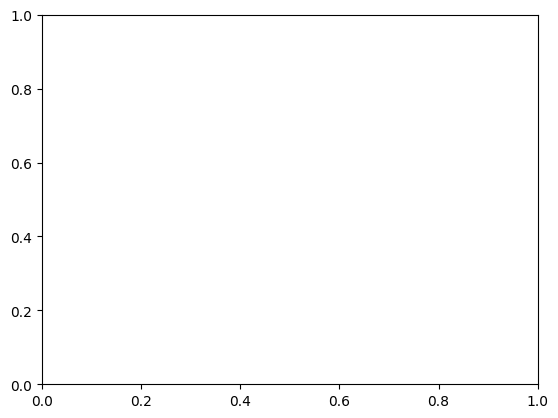

In [31]:
import numpy as np
import matplotlib.pyplot as plt

def plot_clusters(pred_landmarks, real_landmarks, pred_labels, real_labels):
    """
    Plot the predicted and real landmarks with their hierarchical clustering labels.
    :param pred_landmarks: Predicted landmarks.
    :param real_landmarks: Real landmarks.
    :param pred_labels: Cluster labels for predicted landmarks.
    :param real_labels: Cluster labels for real landmarks.
    """
    # Convert landmarks to NumPy arrays for easier indexing
    pred_landmarks = np.array(pred_landmarks)
    real_landmarks = np.array(real_landmarks)
    
    # Plot predicted landmarks with their cluster labels
    plt.scatter(pred_landmarks[:, 0], pred_landmarks[:, 1], c=pred_labels, cmap='viridis', label='Predicted', marker='o')
    
    # Plot real landmarks with their cluster labels
    plt.scatter(real_landmarks[:, 0], real_landmarks[:, 1], c=real_labels, cmap='plasma', label='Real', marker='x')
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Predicted vs Real Landmarks with Hierarchical Clusters')
    plt.legend()
    plt.show()

# Plot clusters
plot_clusters(pred_landmarks, real_landmarks, pred_labels, real_labels)


In [57]:
print(f"Pred landmarks shape: {np.array(pred_landmarks).shape}")
print(f"Real landmarks shape: {np.array(real_landmarks).shape}")
print(f"Pred labels shape: {np.array(pred_labels).shape}")
print(f"Real labels shape: {np.array(real_labels).shape}")

Pred landmarks shape: (6, 2)
Real landmarks shape: (6, 2)
Pred labels shape: (6,)
Real labels shape: (6,)
